In [207]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [208]:
import numpy as np
import pandas as pd

In [209]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [210]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [211]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [212]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [213]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [214]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [215]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [216]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

one_year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
print(one_year_ago)

2016-08-23


In [217]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
#last12Precip = session.query(Measurement.date, Station.name, Measurement.precip)\
              # .filter(Measurement.date>=year_date)\
              # .join(Station, Measurement.station ==Station.station)\
              # .order_by(Measurement.date.desc())

In [218]:
# Perform a query to retrieve the data and precipitation scores
Precipitation = session.query(Measurement.date, Measurement.prcp).\
                filter(Measurement.date > one_year_ago).\
                order_by(Measurement.date).all()
 # Save the query results as a Pandas DataFrame and set the index to the date column
Precipitation_df = pd.DataFrame(Precipitation, columns=['date','prcp'])
#Precipitation_df.set_index(Precipitation_df['date'], inplace=True)
#Precipitation_df.head()
Precipitation_df.set_index('date').head()

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22


Text(0.5,0,'Date')

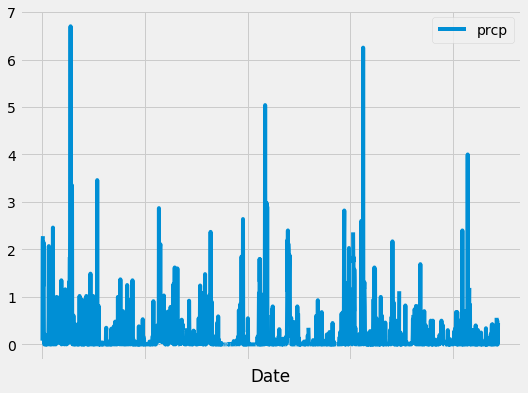

In [219]:
# Use Pandas Plotting with Matplotlib to plot the data
Precipitation_df.plot('date', 'prcp',figsize=(8,6), x_compat=True)
plt.xlabel("Date")



In [220]:
# Use Pandas to calcualte the summary statistics for the precipitation data
Precipitation_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [221]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(Measurement).group_by(Measurement.station).count()
print(station_count)

9


In [222]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
stations_active = session.query(Measurement.station, func.count(Measurement.station)).\
                 group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
stations_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [223]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
temp_recorded = session.query(func.min(Measurement.tobs),\
                func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                filter(Measurement.station == 'USC00519281').all()

temp_recorded

[(54.0, 85.0, 71.66378066378067)]

Text(0,0.5,'frequency')

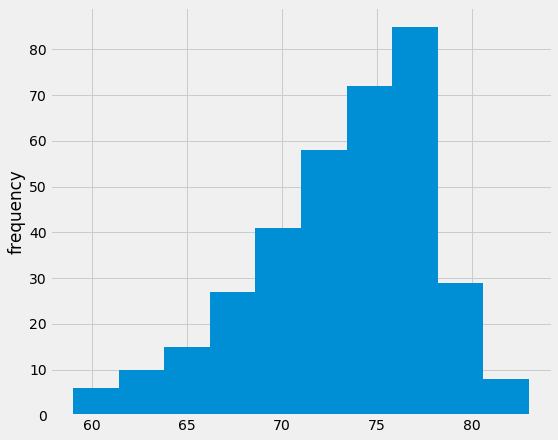

In [224]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
highest_temp = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date > one_year_ago).\
    order_by(Measurement.date).all()

fig2 = plt.figure(figsize=(8,7))
highest_temp_df = pd.DataFrame(highest_temp)
plt.hist(highest_temp_df['tobs'])
figsize=(10,4)
bins=12,

#recipitation_df.plot('date', 'prcp',figsize=(5,6), x_compat=True)
plt.ylabel("frequency")





In [225]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates

def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()


print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [226]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

arrival_date = dt.date(2017, 1, 1)
departure_date = dt.date(2017, 1, 20)
one_year_ago = dt.timedelta(days=365)
stats_year_ago = (calc_temps((arrival_date-one_year_ago), (departure_date-one_year_ago)))
print(stats_year_ago)

[(61.0, 69.46610169491525, 78.0)]


In [394]:
# Load the previous query results into a Pandas DataFrame

stats_year_ago_df= {'TMIN':[], 'TAVE':[], 'TMAX':[]}
for day in stats_year_ago:
    stats_year_ago_df['TMIN'].append(day[0])
    stats_year_ago_df['TAVE'].append(day[1])
    stats_year_ago_df['TMAX'].append(day[2])
   
  
stats_year_ago_df = pd.DataFrame(stats_year_ago_df)
#calc_temps_df.set_index('date', inplace=True)

stats_year_ago_df

,TMIN,TAVE,TMAX
0,61.0,69.466102,78.0


In [230]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
start_date = '2012-08-01'
end_date = '2012-08-07'
  
sel = [Station.station, Station.name, Station.latitude,\
      Station.longitude, Station.elevation,\
      func.sum(Measurement.prcp)]
    
results = session.query(*sel).\
          filter(Measurement.station == Station.station).\
          filter(Measurement.date >= start_date).\
          filter(Measurement.date <= end_date).\
          group_by(Station.name).order_by(func.sum(Measurement.prcp).desc()).all()
print(results)

[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 1.16), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.26), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.24), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.22), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.07), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.01), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, None)]


## Optional Challenge Assignment

In [231]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [264]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
# Set the start and end date of the trip

trip_start = ('2018-01-01')
trip_end = ('2018-01-07')
# Use the start and end date to create a range of dates
trip_dates = pd.date_range(trip_start, trip_end, freq='D')
# Stip off the year and save a list of %m-%d strings
trip_month_day = trip_dates.strftime('%m-%d')
# Loop through the list of %m-%d strings and calculate the normals for each date
normals = []
for date in trip_month_day:
       normals.append(daily_normals(date))
normals
 

[[(62.0, 69.15384615384616, 77.0)],
 [(60.0, 69.39622641509433, 77.0)],
 [(62.0, 68.9090909090909, 77.0)],
 [(58.0, 70.0, 76.0)],
 [(56.0, 67.96428571428571, 76.0)],
 [(61.0, 68.96491228070175, 76.0)],
 [(57.0, 68.54385964912281, 76.0)]]

In [330]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
#normals_df = pd.DataFrame(normals, columns=['tmin','tavg','tmax'])
normals_df = pd.DataFrame(normals, columns=['tmin','tavg','tmax'])

normals_df['date'] = trip_dates
normals_df.set_index(['date'], inplace=True)
normals_df.head()

,0
date,
2018-01-01,"(62.0, 69.15384615384616, 77.0)"
2018-01-02,"(60.0, 69.39622641509433, 77.0)"
2018-01-03,"(62.0, 68.9090909090909, 77.0)"
2018-01-04,"(58.0, 70.0, 76.0)"
2018-01-05,"(56.0, 67.96428571428571, 76.0)"


In [1]:
# Plot the daily normals as an area plot with `stacked=False`
#normals.plot(kind='area', stacked=False, x_compat=True, alpha=.2)
#plt.tight_layout()
#plt.show()